In [1]:
import numpy as np
import time
import jcs_paper_util as util
import pandas as pd

In [2]:
util.matplotlib_setup()
util.default_num_reps = 100
util.single_process = util.single_process_eff

In [9]:
# Query interval default = 1
experiments = [
    ['q_interval', 10 ** np.arange(0,3), 'Query period'],
    ['sample_size', (10 ** np.arange(3, 4.5, 0.5)).astype(int), 'Sample size'],
    ['memo_units', (10 ** np.arange(1, 2.5, 0.5)).astype(int), 'Memory units'],
]

q_interval


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [22:09<00:00,  1.48s/it]


./data_pdf_files/efficiency_q_interval_1650670849.pkl
sample_size


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [24:34<00:00,  1.64s/it]


./data_pdf_files/efficiency_sample_size_1650672324.pkl
memo_units


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [28:02<00:00,  1.87s/it]


./data_pdf_files/efficiency_memo_units_1650674008.pkl


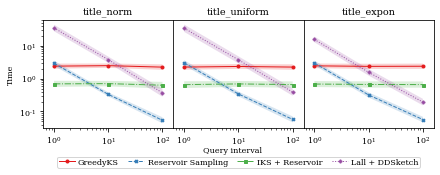

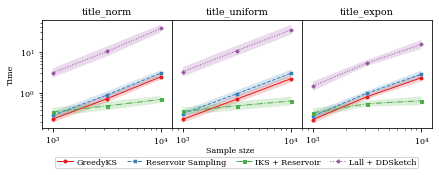

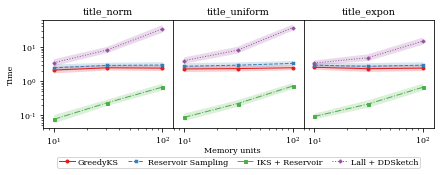

In [3]:
for e in experiments:
    print(e[0])
    results = util.get_results(10, **{e[0]: e[1]})
    timestamp = int(time.time())
    file_name = './data_pdf_files/efficiency_{}_{}.pkl'.format(e[0], timestamp)
    print(file_name)
    results.to_pickle(file_name)
    util.plot_errors(
        results,
        ['title_norm', 'title_uniform', 'title_expon'],
        'Time',
        e[2],
        e[0],
        "./data_pdf_files/efficiency_{}_1.pdf".format(e[0])
        )


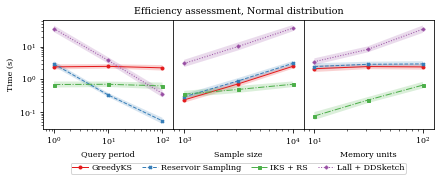

In [17]:
# Query interval default = 1
experiments = [
    ['q_interval_1650670849', 10 ** np.arange(0,3), 'Query period'],
    ['sample_size_1650672324', (10 ** np.arange(3, 4.5, 0.5)).astype(int), 'Sample size'],
    ['memo_units_1650674008', (10 ** np.arange(1, 2.5, 0.5)).astype(int), 'Memory units'],
]

results = {}

for e in experiments:
    r = pd.read_pickle('./data_pdf_files/efficiency_' + e[0] + '.pkl').rename(columns={'IKS + Reservoir': 'IKS + RS'})
    results[e[0][:e[0].rfind('_')]] = (r, e[2])

util.plot_errors2(
    results,
    'Time (s)',
    "./data_pdf_files/efficiency.pdf"
    )